In [1]:
# importing the dependencies
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

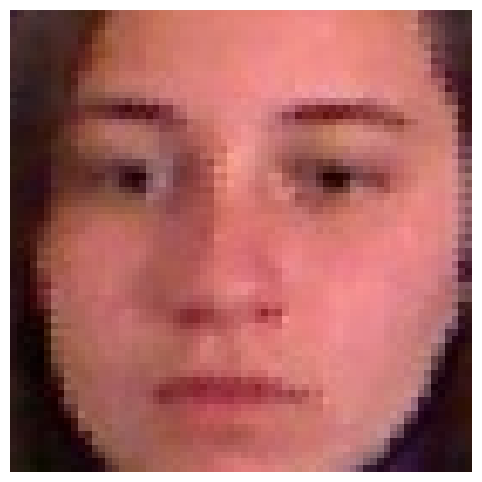

In [7]:
# function to extract face from image
def face_extractor(img):
  image = cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_classifier.detectMultiScale(gray, 1.3, 5)

  cropped_image = None

  if len(faces) > 0:
    for (x, y, w, h) in faces:
      cropped_image = image[y:y+h, x:x+w]
  else:
    cropped_image = image

  return cropped_image

# Checking if the face extractor works or not
cropped_image = face_extractor('Dataset\F06\phrases\\05\\02\color_002.jpg')

if(cropped_image is not None):
    plt.figure(figsize=(8, 6))
    cv2.imwrite('Dataset\F06\phrases\\05\\02\color_002.jpg', cropped_image)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No face found")

In [4]:
os.getcwd() # print current working directory

'c:\\Users\\HP\\Desktop\\Lip Reading'

In [ ]:
for f in os.listdir('dataset/dataset'):
    f_path = os.path.join('dataset/dataset', f)
    if os.path.isdir(f_path):
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)
            if os.path.isdir(l_path):
                for w in os.listdir(l_path):
                    w_path = os.path.join(l_path, w)
                    if os.path.isdir(w_path):
                        for p in os.listdir(w_path):
                            p_path = os.path.join(w_path, p)
                            if os.path.isdir(p_path):
                                for fname in os.listdir(p_path):
                                    if not os.path.isdir(fname):
                                        image_path = os.path.join(p_path, fname)
                                        
                                        # removing all the depth images from dataset
                                        if fname.lower().startswith('depth_'):
                                            os.remove(image_path)

                                        # replacing cropped face with original face in dataset
                                        else:
                                            cropped_face = face_extractor(image_path)
                                            cv2.imwrite(image_path, cropped_face)